In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 8

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
33/36 [==========================>...] - ETA: 0s - loss: 2.0115 - accuracy: 0.1392 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 1s 7ms/step - loss: 2.0059 - accuracy: 0.1441 - val_loss: 1.8945 - val_accuracy: 0.2091
Epoch 2/1000
27/36 [=====================>........] - ETA: 0s - loss: 1.8599 - accuracy: 0.2520
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.8512 - accuracy: 0.2622 - val_loss: 1.7551 - val_accuracy: 0.3536
Epoch 3/1000
 1/36 [..............................] - ETA: 0s - loss: 1.7410 - accuracy: 0.3516

C:\Users\varun\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


15/36 [===========>..................] - ETA: 0s - loss: 1.7611 - accuracy: 0.3161
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 1.7600 - accuracy: 0.3154 - val_loss: 1.6598 - val_accuracy: 0.4367
Epoch 4/1000
23/36 [==================>...........] - ETA: 0s - loss: 1.7049 - accuracy: 0.3373
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.6958 - accuracy: 0.3390 - val_loss: 1.5819 - val_accuracy: 0.5330
Epoch 5/1000
 1/36 [..............................] - ETA: 0s - loss: 1.7421 - accuracy: 0.3125
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.6533 - accuracy: 0.3522 - val_loss: 1.5237 - val_accuracy: 0.5198
Epoch 6/1000
35/36 [============================>.] - ETA: 0s - loss: 1.6152 - accuracy: 0.3850
Epoch 6: savin

32/36 [=========================>....] - ETA: 0s - loss: 1.0528 - accuracy: 0.6125
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.0553 - accuracy: 0.6113 - val_loss: 0.6875 - val_accuracy: 0.8562
Epoch 31/1000
 1/36 [..............................] - ETA: 0s - loss: 1.0383 - accuracy: 0.6797
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.0552 - accuracy: 0.6102 - val_loss: 0.6811 - val_accuracy: 0.8588
Epoch 32/1000
 1/36 [..............................] - ETA: 0s - loss: 0.9505 - accuracy: 0.6797
Epoch 32: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 1.0482 - accuracy: 0.6128 - val_loss: 0.6615 - val_accuracy: 0.8648
Epoch 33/1000
 1/36 [..............................] - ETA: 0s - loss: 0.9077 - accuracy: 0.6875
Epoch 33

27/36 [=====================>........] - ETA: 0s - loss: 0.9251 - accuracy: 0.6727
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.9352 - accuracy: 0.6689 - val_loss: 0.5285 - val_accuracy: 0.8826
Epoch 58/1000
 8/36 [=====>........................] - ETA: 0s - loss: 0.9238 - accuracy: 0.6699
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.9348 - accuracy: 0.6698 - val_loss: 0.5219 - val_accuracy: 0.8852
Epoch 59/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7810 - accuracy: 0.7109
Epoch 59: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.9257 - accuracy: 0.6659 - val_loss: 0.5229 - val_accuracy: 0.8846
Epoch 60/1000
 1/36 [..............................] - ETA: 0s - loss: 1.0377 - accuracy: 0.6016
Epoch 60

34/36 [===========================>..] - ETA: 0s - loss: 0.8846 - accuracy: 0.6905
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8909 - accuracy: 0.6876 - val_loss: 0.4749 - val_accuracy: 0.8925
Epoch 85/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.8775 - accuracy: 0.6822
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8726 - accuracy: 0.6843 - val_loss: 0.4704 - val_accuracy: 0.8958
Epoch 86/1000
36/36 [==============================] - ETA: 0s - loss: 0.8870 - accuracy: 0.6850
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8870 - accuracy: 0.6850 - val_loss: 0.4706 - val_accuracy: 0.8925
Epoch 87/1000
32/36 [=========================>....] - ETA: 0s - loss: 0.8934 - accuracy: 0.6731
Epoch 87

33/36 [==========================>...] - ETA: 0s - loss: 0.8583 - accuracy: 0.7015
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8600 - accuracy: 0.7011 - val_loss: 0.4419 - val_accuracy: 0.8971
Epoch 112/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.8692 - accuracy: 0.6882
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8750 - accuracy: 0.6876 - val_loss: 0.4399 - val_accuracy: 0.9070
Epoch 113/1000
34/36 [===========================>..] - ETA: 0s - loss: 0.8595 - accuracy: 0.6937
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8578 - accuracy: 0.6951 - val_loss: 0.4487 - val_accuracy: 0.8912
Epoch 114/1000
36/36 [==============================] - ETA: 0s - loss: 0.8627 - accuracy: 0.6949
Ep

Epoch 138/1000
34/36 [===========================>..] - ETA: 0s - loss: 0.8517 - accuracy: 0.6946
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8532 - accuracy: 0.6956 - val_loss: 0.4247 - val_accuracy: 0.9116
Epoch 139/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7845 - accuracy: 0.7266
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8466 - accuracy: 0.6986 - val_loss: 0.4327 - val_accuracy: 0.8931
Epoch 140/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7782 - accuracy: 0.7500
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8420 - accuracy: 0.7015 - val_loss: 0.4321 - val_accuracy: 0.8984
Epoch 141/1000
30/36 [========================>.....] - ETA: 0s - loss: 0.8364 - accu

Epoch 165/1000
32/36 [=========================>....] - ETA: 0s - loss: 0.8347 - accuracy: 0.6992
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8407 - accuracy: 0.6991 - val_loss: 0.4147 - val_accuracy: 0.9063
Epoch 166/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.8442 - accuracy: 0.6868
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8392 - accuracy: 0.6874 - val_loss: 0.4184 - val_accuracy: 0.9030
Epoch 167/1000
35/36 [============================>.] - ETA: 0s - loss: 0.8391 - accuracy: 0.6996
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8365 - accuracy: 0.7008 - val_loss: 0.4227 - val_accuracy: 0.8991
Epoch 168/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.8264 - accu

Epoch 192/1000
27/36 [=====================>........] - ETA: 0s - loss: 0.8196 - accuracy: 0.7098
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.8256 - accuracy: 0.7079 - val_loss: 0.4067 - val_accuracy: 0.9030
Epoch 193/1000
 1/36 [..............................] - ETA: 0s - loss: 0.7971 - accuracy: 0.7109
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8161 - accuracy: 0.7149 - val_loss: 0.4059 - val_accuracy: 0.9109
Epoch 194/1000
25/36 [===================>..........] - ETA: 0s - loss: 0.8140 - accuracy: 0.7163
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 6ms/step - loss: 0.8172 - accuracy: 0.7158 - val_loss: 0.4023 - val_accuracy: 0.9037
Epoch 195/1000
22/36 [=================>............] - ETA: 0s - loss: 0.8395 - accu

Epoch 219/1000
32/36 [=========================>....] - ETA: 0s - loss: 0.8247 - accuracy: 0.7134
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8199 - accuracy: 0.7127 - val_loss: 0.3978 - val_accuracy: 0.9083
Epoch 220/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.8111 - accuracy: 0.7147
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8030 - accuracy: 0.7154 - val_loss: 0.4019 - val_accuracy: 0.9077
Epoch 221/1000
31/36 [========================>.....] - ETA: 0s - loss: 0.8020 - accuracy: 0.7130
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8026 - accuracy: 0.7127 - val_loss: 0.3950 - val_accuracy: 0.9090
Epoch 222/1000
34/36 [===========================>..] - ETA: 0s - loss: 0.8039 - accu

Epoch 246/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.8159 - accuracy: 0.7107
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8195 - accuracy: 0.7094 - val_loss: 0.3930 - val_accuracy: 0.9011
Epoch 247/1000
 1/36 [..............................] - ETA: 0s - loss: 1.0128 - accuracy: 0.6484
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 4ms/step - loss: 0.8059 - accuracy: 0.7134 - val_loss: 0.3953 - val_accuracy: 0.9057
Epoch 248/1000
35/36 [============================>.] - ETA: 0s - loss: 0.8025 - accuracy: 0.7143
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8035 - accuracy: 0.7129 - val_loss: 0.3999 - val_accuracy: 0.9024
Epoch 249/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.8152 - accu

Epoch 273/1000
36/36 [==============================] - ETA: 0s - loss: 0.7859 - accuracy: 0.7180
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.7859 - accuracy: 0.7180 - val_loss: 0.3882 - val_accuracy: 0.9077
Epoch 274/1000
34/36 [===========================>..] - ETA: 0s - loss: 0.8106 - accuracy: 0.7114
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.8084 - accuracy: 0.7132 - val_loss: 0.3931 - val_accuracy: 0.9050
Epoch 275/1000
33/36 [==========================>...] - ETA: 0s - loss: 0.7952 - accuracy: 0.7263
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
36/36 [==============================] - 0s 3ms/step - loss: 0.7914 - accuracy: 0.7264 - val_loss: 0.3973 - val_accuracy: 0.9037
Epoch 276/1000
36/36 [==============================] - ETA: 0s - loss: 0.8051 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 1ms/step - loss: 0.4020 - accuracy: 0.9044


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 62ms/step
[4.3200362e-01 3.6383547e-02 6.4456032e-04 3.9985898e-01 1.2820841e-01
 4.2332659e-04 5.8352975e-06 2.4716631e-03]
0


# 混同行列

48/48 [==============================] - 0s 895us/step


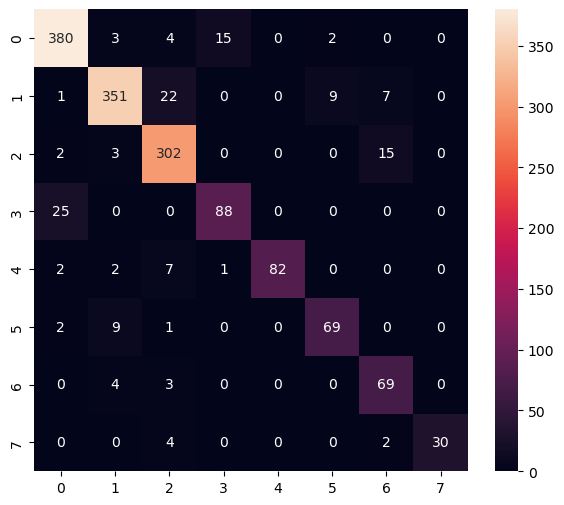

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       404
           1       0.94      0.90      0.92       390
           2       0.88      0.94      0.91       322
           3       0.85      0.78      0.81       113
           4       1.00      0.87      0.93        94
           5       0.86      0.85      0.86        81
           6       0.74      0.91      0.82        76
           7       1.00      0.83      0.91        36

    accuracy                           0.90      1516
   macro avg       0.90      0.88      0.89      1516
weighted avg       0.91      0.90      0.90      1516



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\varun\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\varun\AppData\Local\Temp\tmp_p5o0_m2\assets


INFO:tensorflow:Assets written to: C:\Users\varun\AppData\Local\Temp\tmp_p5o0_m2\assets


6720

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.3200356e-01 3.6383554e-02 6.4455904e-04 3.9985922e-01 1.2820832e-01
 4.2332654e-04 5.8352794e-06 2.4716605e-03]
0
